In [4]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fancyimpute import KNN
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import AdaBoostRegressor

# hide warnings
import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [5]:
# Reading the dataset
football_dataset = pd.read_csv('C:/Users/SHRITHAKAR/Desktop/UpGrad/Datasets/Regression/European_Rosters.csv')

In [6]:
football_dataset.head()

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,...,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,...,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,...,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,...,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN


### Data Cleaning and Imputation

In [7]:
# Calculating the percentage of null values
football_dataset.isnull().sum()/len(football_dataset)*100

FullName                             52.367688
PlayerName                            0.000000
Affiliation                           0.000000
League                                0.000000
Jersey                                1.601671
Birth Date                            0.000000
Age                                   0.000000
birthPlace                            3.667595
Height (meters)                       1.926648
Citizenship 1                         0.232126
Citizenship 2                        82.776230
Position                              1.578459
Position 2                            0.023213
Foot                                  4.874652
Agent                                15.993500
JoinedClub                           43.407614
LastExtension                        67.084494
ContractExpiration                    8.751161
PlayerSponsor                        77.576602
Youth Club 1                         30.246054
Youth Club 2                         56.313835
Youth Club 3 

In [8]:
# Removing the columns with higher percentage of null values
football_dataset.drop(columns=['FullName','Citizenship 2','JoinedClub','LastExtension','Youth Club 2','Youth Club 3','Youth Club 4','Youth Club 5','Youth Club 6','Youth Club 7','MostRecentInjury','PlayerSponsor'],inplace=True)

In [9]:
# Filling null values of few features with mean/mode of the datset
football_dataset['Height (meters)'].fillna(value=football_dataset['Height (meters)'].mean(),inplace=True)
football_dataset['Foot'].fillna(value=football_dataset['Foot'].mode()[0],inplace=True)
football_dataset['Jersey'].fillna(value=football_dataset['Jersey'].mode()[0],inplace=True)
football_dataset['birthPlace'].fillna(value=football_dataset['birthPlace'].mode()[0],inplace=True)
football_dataset['Citizenship 1'].fillna(value=football_dataset['Citizenship 1'].mode()[0],inplace=True)

In [10]:
len(football_dataset)

4308

In [11]:
football_dataset['Position'].unique()

array(['Forward ', 'Defender ', 'Midfielder ', 'Goalkeeper',
       'Position:                            Goalkeeper',
       'Position:                            Left', nan,
       'Contract expires:',
       'Position:                            Central Midfield',
       'Position:                            Right Winger',
       'Position:                            Centre',
       'Position:                            Left Winger',
       'Position:                            Attacking Midfield',
       'Position:                            Right',
       'Position:                            Second Striker',
       'Position:                            Defensive Midfield',
       'Midfielder'], dtype=object)

In [12]:
# Replacing the values as Position feature contains line position of the player
football_dataset['Position'].replace(to_replace="Position:                            Central Midfield",value="Midfielder ",inplace=True)
football_dataset['Position'].replace(to_replace="Position:                            Right Winger",value="Forward ",inplace=True)
football_dataset['Position'].replace(to_replace="Position:                            Centre",value="Defender ",inplace=True)
football_dataset['Position'].replace(to_replace="Position:                            Left",value="Defender ",inplace=True)
football_dataset['Position'].replace(to_replace="Position:                            Goalkeeper",value="Goalkeeper",inplace=True)
football_dataset['Position'].replace(to_replace="Position:                            Left Winger",value="Forward ",inplace=True)
football_dataset['Position'].replace(to_replace="Position:                            Attacking Midfield",value="Midfielder ",inplace=True)
football_dataset['Position'].replace(to_replace="Position:                            Right",value="Defender ",inplace=True)
football_dataset['Position'].replace(to_replace="Position:                            Second Striker",value="Forward ",inplace=True)
football_dataset['Position'].replace(to_replace="Position:                            Defensive Midfield",value="Midfielder ",inplace=True)
football_dataset['Position'].replace(to_replace="Midfielder",value="Midfielder ",inplace=True)
football_dataset['Position'].replace('',np.nan,inplace=True)

# Dropping null values 
football_dataset.dropna(subset=['Position'],inplace=True)
football_dataset.reset_index(drop=True,inplace=True)
football_dataset.drop(football_dataset[football_dataset['Position']=="Contract expires:"].index,inplace=True,axis=0)

In [13]:
football_dataset['Position 2'].unique()

array(['Centre-Forward', 'Right-Back', 'Defensive Midfield', 'Goalkeeper',
       'Right Midfield', 'Left Winger', 'Attacking Midfield', 'Left-Back',
       'Centre-Back', 'Right Winger', 'Central Midfield',
       'Second Striker', 'Left Midfield', 'Contract expires:30.06.2023',
       'Contract expires:30.06.2022', 'Contract expires:30.06.2020',
       'Contract expires:30.06.2021', nan, 'Contract expires:-',
       'Contract expires:30.06.2025', 'Contract expires:30.06.2024',
       'Midfielder'], dtype=object)

In [14]:
# Replacing the values as Position 2 feature
football_dataset['Position 2'].replace('Contract expires:30.06.2020',np.nan,inplace=True)
football_dataset['Position 2'].replace('Contract expires:30.06.2021',np.nan,inplace=True)
football_dataset['Position 2'].replace('Contract expires:30.06.2022',np.nan,inplace=True)
football_dataset['Position 2'].replace('Contract expires:30.06.2023',np.nan,inplace=True)
football_dataset['Position 2'].replace('Contract expires:30.06.2024',np.nan,inplace=True)
football_dataset['Position 2'].replace('Contract expires:30.06.2025',np.nan,inplace=True)
football_dataset['Position 2'].replace('Contract expires:-',np.nan,inplace=True)
football_dataset.dropna(subset=['Position 2'],inplace=True)

In [15]:
football_dataset['Agent'].unique()

array([nan, 'Kögl & Partner GmbH', 'SportPlus Football ...', 'PRO FC',
       'DC International ...', 'M-Soccermanagement', '11WINS',
       'LIAN SPORTS', 'GRASS IS GREEN', 'SportsTotal', 'Promoesport',
       'act', 'Juanma López y ...', 'SEG', 'arena11 sports group',
       'T21plus', 'Siebert & Backs', 'ROGON', 'Coaches & More GmbH',
       'Daniel Van Buyten', 'ProSoccer', 'AL Eventos ...',
       'PRO Profil GmbH', 'Rechtsanwalt Oliver ...', 'FSB – ...',
       'feel soccer GmbH', 'Apertura Sports GmbH', 'IFM',
       'Robert Schneider', 'Stellar Football Ltd', 'Pierre-Henri Bovis',
       'St. Juste Management', 'BALLWERK Sports GmbH',
       'Sports United GmbH', 'PRO Profil GmbH, U23', 'Léandre Chouya',
       'Relatives', 'ISMG International', 'IS SPORTS AGENCY ...',
       'SBE Management AG', 'Universal Sports ...', 'W&K Fairplay',
       'Samii ...', 'Haspel ...', 'Mino Raiola',
       'M.A.R.A.T. Football ...', 'Alessandro Lucci - ...', 'no agent',
       'Ambition Group'

In [16]:
# Replacing the null values of few features with Not Available
football_dataset['Agent'].replace(np.nan,'NA',inplace=True)
football_dataset['Youth Club 1'].replace(np.nan,'NA',inplace=True)

football_dataset.dropna(subset=['Market Value (Euros)','Highest Market Value (Euros)'],inplace=True)

In [17]:
football_dataset = football_dataset[football_dataset['ContractExpiration'] != '-']                                      
football_dataset.dropna(subset=['ContractExpiration'],inplace=True)

In [18]:
football_dataset = football_dataset.reset_index(drop = True)

#Splitting the column value to get the date.
for i in range(0,len(football_dataset)):
    football_dataset.loc[i,'Last Updated Date'] = football_dataset['Last Updated Date'].str.split(':')[i][1]


In [19]:
football_dataset['Birth Date'] = pd.to_datetime(football_dataset['Birth Date'])
football_dataset['ContractExpiration'] = pd.to_datetime(football_dataset['ContractExpiration'])
football_dataset['Last Updated Date'] = pd.to_datetime(football_dataset['Last Updated Date'])
football_dataset['Highest Market Value Date'] = pd.to_datetime(football_dataset['Highest Market Value Date'])
# ['Last Updated Date','Birth Date','ContractExpiration','Highest Market Value Date']

# football_dataset.loc[football_dataset['ContractExpiration'] == 'Not Known'].count()

In [20]:
football_dataset['ContractExpiration'].head()

0   2023-06-30
1   2022-06-30
2   2023-06-30
3   2021-06-30
4   2021-06-30
Name: ContractExpiration, dtype: datetime64[ns]

In [21]:
current_date = pd.to_datetime('2020-04-05')

for i in range(0,len(football_dataset)):
    diff_date = current_date - football_dataset['ContractExpiration'][i]
    football_dataset.loc[i,'ContractExpiration'] = diff_date.days
    diff_date = current_date - football_dataset['Last Updated Date'][i]
    football_dataset.loc[i,'Last Updated Date'] = diff_date.days
    diff_date = current_date - football_dataset['Highest Market Value Date'][i]
    football_dataset.loc[i,'Highest Market Value Date'] = diff_date.days    


In [22]:
# Calculating the percentage of null values
football_dataset.isnull().sum()/len(football_dataset)*100

PlayerName                           0.0
Affiliation                          0.0
League                               0.0
Jersey                               0.0
Birth Date                           0.0
Age                                  0.0
birthPlace                           0.0
Height (meters)                      0.0
Citizenship 1                        0.0
Position                             0.0
Position 2                           0.0
Foot                                 0.0
Agent                                0.0
ContractExpiration                   0.0
Youth Club 1                         0.0
nationality                          0.0
Games Played                         0.0
Market Value (Euros)                 0.0
Last Updated Date                    0.0
Accumulated Transfer Sums (Euros)    0.0
Highest Market Value (Euros)         0.0
Highest Market Value Date            0.0
NationalTeamCaps                     0.0
dtype: float64

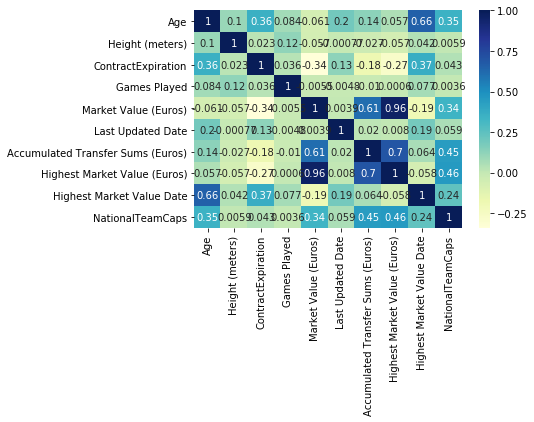

In [23]:
# Checking correlation between the numeric variables
sns.heatmap(football_dataset.corr(),cmap="YlGnBu",annot = True)

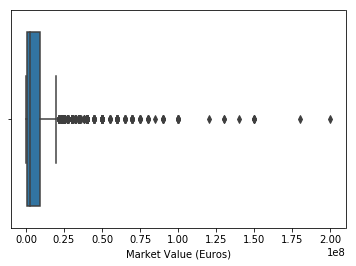

In [24]:
# Checking for outliers for target variable
sns.boxplot(football_dataset['Market Value (Euros)'])

In [25]:
# Removing outliers
Q1 = football_dataset['Market Value (Euros)'].quantile(0.01)
Q3 = football_dataset['Market Value (Euros)'].quantile(0.7)
IQR = Q3 - Q1

filter = (football_dataset['Market Value (Euros)'] >= Q1 - 1.5 * IQR) & (football_dataset['Market Value (Euros)'] <= Q3 + 1.5 *IQR)
main_football_df = football_dataset.loc[filter]
print(len(main_football_df))

3232


In [26]:
# Checking for duplicate rows.
len(main_football_df.loc[main_football_df.duplicated()])

0

### Data Preparation

In [27]:
main_football_df = main_football_df.reset_index(drop = True)
categorical_vars = list(main_football_df.select_dtypes(include='object').columns)

# Removing irrelevant variables
categorical_vars.remove('PlayerName')
categorical_vars.remove('Jersey')

print(categorical_vars)

['Affiliation', 'League', 'birthPlace', 'Citizenship 1', 'Position', 'Position 2', 'Foot', 'Agent', 'Youth Club 1', 'nationality']


In [28]:
main_football_df.head()

,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,Position,...,ContractExpiration,Youth Club 1,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps
0,Anthony Modeste,1. FC Koln,Bundesliga,#27,1988-04-14,31,Cannes,1.87,France,Forward,...,-1181,ES Fréjus (2001–2003),France,1,7000000.0,298,45700000,20000000.0,1021,16
1,Benno Schmitz,1. FC Koln,Bundesliga,#2,1994-11-17,25,München,1.82,Germany,Defender,...,-816,SV Waldperlach (-2001),Germany,0,1000000.0,298,1000000,1750000.0,1110,11
2,Birger Verstraete,1. FC Koln,Bundesliga,#8,1994-04-16,25,Oostende,1.75,Belgium,Midfielder,...,-1181,KV Oostende (-07/2002),Belgium,0,4000000.0,300,4850000,4000000.0,572,1
3,Brady Scott,1. FC Koln,Bundesliga,#31,1999-06-30,20,"Petaluma, California",1.87,United States,Goalkeeper,...,-451,NA,United States,14,100000.0,298,0,100000.0,611,0
4,Christian Clemens,1. FC Koln,Bundesliga,#17,1991-08-04,28,Köln,1.79,Germany,Midfielder,...,-451,SC Weiler-Volkhoven (1997-2001),Germany,15,1750000.0,298,7950000,3500000.0,2472,5


In [29]:
# Creating dummy variables for the categorical variables and dropping the original ones.
dummy_vars = pd.get_dummies(main_football_df[categorical_vars],drop_first=True)
main_football_df = pd.concat([main_football_df,dummy_vars],axis = 1)
main_football_df.drop(categorical_vars,axis = 1, inplace = True)
main_football_df.head()

,PlayerName,Jersey,Birth Date,Age,Height (meters),ContractExpiration,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),...,nationality_Turkey,nationality_Ukraine,nationality_United States,nationality_Uruguay,nationality_Uzbekistan,nationality_Venezuela,nationality_Vietnam,nationality_Wales,nationality_Zambia,nationality_Zimbabwe
0,Anthony Modeste,#27,1988-04-14,31,1.87,-1181,1,7000000.0,298,45700000,...,0,0,0,0,0,0,0,0,0,0
1,Benno Schmitz,#2,1994-11-17,25,1.82,-816,0,1000000.0,298,1000000,...,0,0,0,0,0,0,0,0,0,0
2,Birger Verstraete,#8,1994-04-16,25,1.75,-1181,0,4000000.0,300,4850000,...,0,0,0,0,0,0,0,0,0,0
3,Brady Scott,#31,1999-06-30,20,1.87,-451,14,100000.0,298,0,...,0,0,1,0,0,0,0,0,0,0
4,Christian Clemens,#17,1991-08-04,28,1.79,-451,15,1750000.0,298,7950000,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(main_football_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_vars = df_train.select_dtypes(include=['int64','float64']).columns
# Apply scaler() to all the numerical variables
df_train.loc[:,num_vars] = scaler.fit_transform(df_train.loc[:,num_vars])

df_test.loc[:,num_vars] = scaler.transform(df_test.loc[:,num_vars])

In [32]:
# Splitting train and target variable
y_train = df_train['Market Value (Euros)']
X_train = df_train.drop(['Birth Date','Market Value (Euros)','PlayerName','Jersey'],axis = 1)

y_test = df_test['Market Value (Euros)']
X_test = df_test.drop(['Birth Date','Market Value (Euros)','PlayerName','Jersey'],axis = 1)

# X_train = X_train.values.reshape(-1,1)
# y_train = y_train.values.reshape(-1,1)
# X_test = X_test.values.reshape(-1,1)
# y_test = y_test.values.reshape(-1,1)

### Model Buliding

# Normal Linear Regression 

In [33]:
lr = LinearRegression()
normal_lr = lr.fit(X_train,y_train)
y_test_pred_normal = lr.predict(X_test)
y_train_pred_normal = lr.predict(X_train)

In [34]:
# Evaluation of the model.
# On Trained Dataset
print("Mean absolute error of Normal Linear Model on Trained Dataset",round(mean_absolute_error(y_true=y_train, y_pred=y_train_pred_normal, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Normal Linear Model on Trained Dataset",round(r2_score(y_true=y_train, y_pred=y_train_pred_normal, sample_weight=None, multioutput='uniform_average'),3))


# On Test Dataset
print("Mean absolute error of Normal Linear Model",round(mean_absolute_error(y_true=y_test, y_pred=y_test_pred_normal, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Normal Linear Model",round(r2_score(y_true=y_test, y_pred=y_test_pred_normal, sample_weight=None, multioutput='uniform_average'),3))




Mean absolute error of Normal Linear Model on Trained Dataset 0.0
R-squared value of Normal Linear Model on Trained Dataset 1.0
Mean absolute error of Normal Linear Model 0.514
R-squared value of Normal Linear Model 0.535


`This shows that the model is over-fitting as the test accuracy is very less than that of training accuracy.`

# 1. Ridge

In [35]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [36]:
# print(ridge.get_params().keys())
# print(lr.get_params().keys())
# print(lasso.get_params().keys())

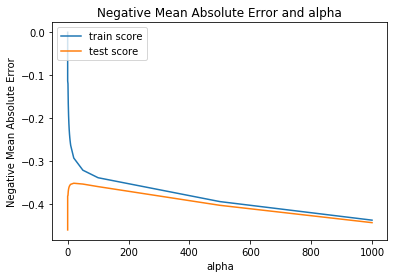

In [37]:
# Writing the results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

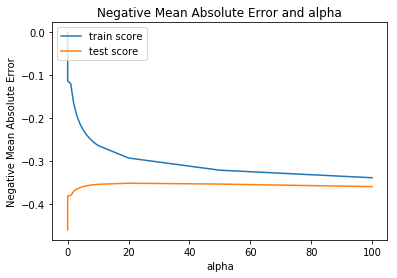

In [38]:
# Narrowing down the graph for better visualisation

# Writing the results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]

# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [39]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", model_cv.best_score_)
print(model_cv.best_estimator_)

best accuracy -0.35110751943214596
Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [40]:
# Fitting the final model with alpha value 20.
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
sorted(list(zip(ridge.coef_,X_train.columns)),reverse = True)

[(0.8564360189571791, 'Highest Market Value (Euros)'),
 (0.2766609196319098, 'League_Premier League'),
 (0.18687658566809598, 'Affiliation_RB Leipzig'),
 (0.16768432017765553, 'Affiliation_Sevilla FC'),
 (0.15747571281603726, 'Affiliation_PSV Eindhoven'),
 (0.15330002371163468, 'Affiliation_Southampton'),
 (0.13941312915039314, 'Affiliation_Bay. Leverkusen'),
 (0.13367504967597355, 'Affiliation_Atalanta'),
 (0.1303038275203889, 'Affiliation_VfL Wolfsburg'),
 (0.12656329548638337, 'Agent_M.A.R.A.T. Football ...'),
 (0.12464658246811698, 'Affiliation_Olympique Lyon'),
 (0.1237831848523056, 'birthPlace_João Pessoa'),
 (0.10508403469442794, 'Affiliation_Benfica'),
 (0.10344941887391952, 'nationality_Mexico'),
 (0.10344941887391952, 'Citizenship 1_Mexico'),
 (0.10034950975179976, 'Affiliation_Krasnodar'),
 (0.09985616088855018, 'Affiliation_Sassuolo'),
 (0.09917150203591851, 'nationality_Slovenia'),
 (0.09917150203591851, 'Citizenship 1_Slovenia'),
 (0.0979753766390161, 'Agent_IFM'),
 (0.09

In [41]:
# Predicting the value and evaluation of the model.
y_train_pred_ridge = ridge.predict(X_train)

print("Mean absolute error of Ridge Model on Trained Dataset",round(mean_absolute_error(y_true=y_train, y_pred=y_train_pred_ridge, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Ridge Model on Trained Dataset",round(r2_score(y_true=y_train, y_pred=y_train_pred_ridge, sample_weight=None, multioutput='uniform_average'),3))



y_test_pred_ridge = ridge.predict(X_test)

print("Mean absolute error of Ridge Model",round(mean_absolute_error(y_true=y_test, y_pred=y_test_pred_ridge, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Ridge Model",round(r2_score(y_true=y_test, y_pred=y_test_pred_ridge, sample_weight=None, multioutput='uniform_average'),3))

Mean absolute error of Ridge Model on Trained Dataset 0.294
R-squared value of Ridge Model on Trained Dataset 0.826
Mean absolute error of Ridge Model 0.35
R-squared value of Ridge Model 0.757


# 2. DecisionTreeRegressor

In [42]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'criterion': ["mse", "mae"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': r

In [43]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8340688540471642
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [44]:
# model with optimal hyperparameters
reg_decision = DecisionTreeRegressor(criterion = "mse", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
reg_decision.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [45]:
# Predicting the value and evaluation of the model.
y_train_pred_decision = reg_decision.predict(X_train)

print("Mean absolute error of Decision Tree Regressor Model on Trained Dataset",round(mean_absolute_error(y_true=y_train, y_pred=y_train_pred_decision, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Decision Tree Regressor Model on Trained Dataset",round(r2_score(y_true=y_train, y_pred=y_train_pred_decision, sample_weight=None, multioutput='uniform_average'),3))



y_test_pred_decision = reg_decision.predict(X_test)

print("Mean absolute error of Decision Tree Regressor Model",round(mean_absolute_error(y_true=y_test, y_pred=y_test_pred_decision, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Decision Tree Regressor Model",round(r2_score(y_true=y_test, y_pred=y_test_pred_decision, sample_weight=None, multioutput='uniform_average'),3))

Mean absolute error of Decision Tree Regressor Model on Trained Dataset 0.183
R-squared value of Decision Tree Regressor Model on Trained Dataset 0.88
Mean absolute error of Decision Tree Regressor Model 0.207
R-squared value of Decision Tree Regressor Model 0.863


# 3. Lasso

In [46]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_lasso.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [47]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", model_cv_lasso.best_score_)
print(model_cv_lasso.best_estimator_)

best accuracy -0.3453125764422005
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [48]:
# Fitting the final model with alpha value 0.001.
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
sorted(list(zip(lasso.coef_,X_train.columns)),reverse = True)

[(0.9025225318100039, 'Highest Market Value (Euros)'),
 (0.40651887605398673, 'Affiliation_RB Leipzig'),
 (0.3623792949529309, 'League_Premier League'),
 (0.31755173451150487, 'Affiliation_Sevilla FC'),
 (0.25056309314468667, 'Affiliation_Bay. Leverkusen'),
 (0.216610828228104, 'Citizenship 1_Mexico'),
 (0.20748634833693036, 'Affiliation_PSV Eindhoven'),
 (0.20395341762490118, 'Affiliation_VfL Wolfsburg'),
 (0.20271603284422193, 'Citizenship 1_Slovenia'),
 (0.19973526397725994, 'Affiliation_Atalanta'),
 (0.18207534815176113, 'birthPlace_João Pessoa'),
 (0.15912473624609857, 'Affiliation_Southampton'),
 (0.1397310040999724, 'Agent_M.A.R.A.T. Football ...'),
 (0.125060740235309, 'Affiliation_Olympique Lyon'),
 (0.12443302740152018, 'Citizenship 1_Argentina'),
 (0.10189630809288967, 'Affiliation_Espanyol'),
 (0.09663430768552245, 'Affiliation_Hertha BSC'),
 (0.08384915486349301, 'Affiliation_Krasnodar'),
 (0.08071827268020867, 'Affiliation_Getafe'),
 (0.07981185347928563, 'Agent_IFM'),
 (

In [49]:
# Predicting the value and evaluation of the model.
# On Trained Dataset
y_train_pred_lasso = lasso.predict(X_train)
print("Mean absolute error of Ridge Model on Trained Dataset",round(mean_absolute_error(y_true=y_train, y_pred=y_train_pred_lasso, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Ridge Model on Trained Dataset",round(r2_score(y_true=y_train, y_pred=y_train_pred_lasso, sample_weight=None, multioutput='uniform_average'),3))


# On Test Dataset
y_test_pred_lasso = lasso.predict(X_test)

print("Mean absolute error of Ridge Model",round(mean_absolute_error(y_true=y_test, y_pred=y_test_pred_lasso, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Ridge Model",round(r2_score(y_true=y_test, y_pred=y_test_pred_lasso, sample_weight=None, multioutput='uniform_average'),3))

Mean absolute error of Ridge Model on Trained Dataset 0.321
R-squared value of Ridge Model on Trained Dataset 0.794
Mean absolute error of Ridge Model 0.346
R-squared value of Ridge Model 0.751


## Ensemble methods

### Ridge

In [50]:
ridge = Ridge()
ensemble = AdaBoostRegressor(base_estimator= ridge)

# list of alphas to tune
params = {'n_estimators': [10,30,50],
         'learning_rate': [0.25,0.5,1]}


# cross validation
folds = 5
model_cv_ensemble = GridSearchCV(estimator = ensemble, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ensemble.fit(X_train, y_train) 



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 49.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=Ridge(alpha=1.0,
                                                              copy_X=True,
                                                              fit_intercept=True,
                                                              max_iter=None,
                                                              normalize=False,
                                                              random_state=None,
                                                              solver='auto',
                                                              tol=0.001),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.25, 0.5, 0.75, 1],
                         'n_estimators': [10, 20, 30, 40, 50]},
             pre_disp

In [51]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", model_cv_ensemble.best_score_)
print(model_cv_ensemble.best_estimator_)
print(model_cv_ensemble.best_params_)

best accuracy -0.38167456073285255
AdaBoostRegressor(base_estimator=Ridge(alpha=1.0, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=False, random_state=None,
                                       solver='auto', tol=0.001),
                  learning_rate=0.25, loss='linear', n_estimators=10,
                  random_state=None)
{'learning_rate': 0.25, 'n_estimators': 10}


In [52]:
# Fitting the final model.
ensemble = AdaBoostRegressor(base_estimator=ridge, n_estimators= 10, learning_rate=0.25)
ensemble.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=1.0, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=False, random_state=None,
                                       solver='auto', tol=0.001),
                  learning_rate=0.25, loss='linear', n_estimators=10,
                  random_state=None)

In [53]:
# Predicting the value and evaluation of the model.

# On Test Dataset
y_test_pred_ensemble = ensemble.predict(X_test)

print("Mean absolute error of Ensemble Model",round(mean_absolute_error(y_true=y_test, y_pred=y_test_pred_ensemble, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Ensemble Model",round(r2_score(y_true=y_test, y_pred=y_test_pred_ensemble, sample_weight=None, multioutput='uniform_average'),3))

Mean absolute error of Ensemble Model 0.386
R-squared value of Ensemble Model 0.724


### Decision Tree

In [ ]:
dtree = DecisionTreeRegressor()
ensemble = AdaBoostRegressor(base_estimator= dtree)

# list of alphas to tune
params = {'n_estimators': [10,30,50],
         'learning_rate': [0.25,0.5,1]}


# cross validation
folds = 5
model_cv_ensemble_dtree = GridSearchCV(estimator = ensemble, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ensemble_dtree.fit(X_train, y_train) 



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", model_cv_ensemble_dtree.best_score_)
print(model_cv_ensemble_dtree.best_estimator_)

In [96]:
# Fitting the final model.
ensemble = AdaBoostRegressor(base_estimator=dtree, n_estimators= 50, learning_rate=0.25)
ensemble.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [97]:
# Predicting the value and evaluation of the model.

# On Test Dataset
y_test_pred_ensemble = ensemble.predict(X_test)

print("Mean absolute error of Ensemble Model",round(mean_absolute_error(y_true=y_test, y_pred=y_test_pred_ensemble, sample_weight=None, multioutput='uniform_average'),3))
print("R-squared value of Ensemble Model",round(r2_score(y_true=y_test, y_pred=y_test_pred_ensemble, sample_weight=None, multioutput='uniform_average'),3))

Mean absolute error of Ensemble Model 0.15
R-squared value of Ensemble Model 0.893
